In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re # regular expression
import seaborn as sns
import matplotlib as plt
%matplotlib inline
import nltk

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))


In [5]:

#Import the data set
df=pd.read_csv("C:\\Users\\laxmimanasaa\\Downloads\\blogs\\blogtext.csv")

In [6]:
# see few rows of the imported dataset
df.head()

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...


In [7]:
# Check the number of rows and columns
df.shape

(681284, 7)

In [8]:
#Check Data types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 681284 entries, 0 to 681283
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      681284 non-null  int64 
 1   gender  681284 non-null  object
 2   age     681284 non-null  int64 
 3   topic   681284 non-null  object
 4   sign    681284 non-null  object
 5   date    681284 non-null  object
 6   text    681284 non-null  object
dtypes: int64(2), object(5)
memory usage: 36.4+ MB


In [9]:
# Check for missing values present
print('Number of missing values across columns-\n', df.isnull().sum())


Number of missing values across columns-
 id        0
gender    0
age       0
topic     0
sign      0
date      0
text      0
dtype: int64


There are 68,124 records which is large in size to perform analysis and computation, hence we are going to take a subset and rerun with the entire data-set once all errors are fixed and optimization is done


<AxesSubplot:xlabel='gender', ylabel='count'>

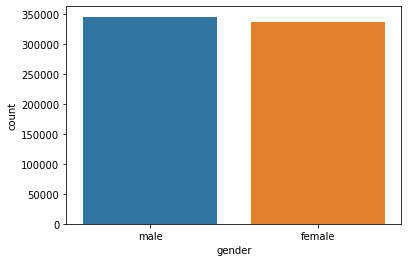

In [10]:
# Checking gendre distribution
sns.countplot(x='gender',data=df)

<AxesSubplot:xlabel='sign', ylabel='count'>

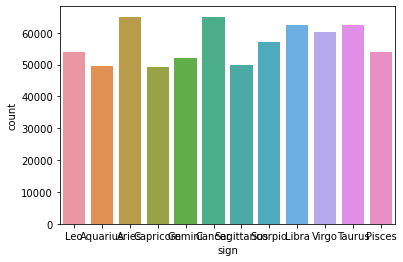

In [11]:
# Checking sign distribution
sns.countplot(x='sign',data=df)

In [12]:
# Creation of data sub-set
data=df.head(15000)


In [11]:
# dropping non value added variables - id & date
data.drop(['id','date'], axis=1, inplace=True)

<ipython-input-11-d552af6fab81>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(['id','date'], axis=1, inplace=True)


In [13]:

# looking at few rows post dropping non value added variables
data.head()


,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...


In [14]:

# converting "age" from int to object
data['age']=data['age'].astype('object')

<ipython-input-14-6efc932712a6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['age']=data['age'].astype('object')


In [15]:
# check to ensure all columns in object type
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      15000 non-null  int64 
 1   gender  15000 non-null  object
 2   age     15000 non-null  object
 3   topic   15000 non-null  object
 4   sign    15000 non-null  object
 5   date    15000 non-null  object
 6   text    15000 non-null  object
dtypes: int64(1), object(6)
memory usage: 820.4+ KB


## Data Wrangling for data['text'] column to remove all unwanted text from the column

In [ ]:
# remove unwanted spaces

data ['clean_data']= data['clean_data'].apply(lambda x: x.strip())

In [ ]:
# remove unwanted spaces

data ['clean_data']= data['clean_data'].apply(lambda x: x.strip())

In [ ]:

# converting "age" from int to object
data['age']=data['age'].astype('object')


In [ ]:
# check to ensure all columns in object type
data.info()



## Data Wrangling for data['text'] column to remove all unwanted text from the column

In [ ]:
# remove unwanted chars other than alphanumeric
data['clean_data']=data['text'].apply(lambda x: re.sub(r'[^A-Za-z]+',' ',x))

In [ ]:
# covert text to lower
data['clean_data']=data['clean_data'].apply(lambda x: x.lower())


In [ ]:
# remove unwanted spaces
data['clean_data']=data['clean_data'].apply(lambda x: x.strip())


In [ ]:
print("Actual data=======> {}".format(data['text'][1]))

## Removing all stopwords

In [ ]:
#remove stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')


In [ ]:

stopwords=set(stopwords.words('english'))

In [ ]:
data['clean_data']=data['clean_data'].apply(lambda x: ' '.join([words for words in x.split() if words not in stopwords]))

In [ ]:
data['clean_data'][6]

## Merging all other cols into label col.

In [ ]:
# merging cols. gender, age, topic and sign into lables col
data['labels']=data.apply(lambda col: [col['gender'],str(col['age']),col['topic'],col['sign']], axis=1)


In [ ]:
# look at data set post merging cols
data.head()


In [ ]:

# retain data set with two pre-processed columns 
data=data[['clean_data','labels']]


In [ ]:
data.head()

## Splitting the data into X and Y


In [ ]:
X=data['clean_data']

In [ ]:
Y=data['labels']


In [ ]:
#perform count vectorizer with bi-grams and tri-grams to get the count vectors of the X data
from sklearn.feature_extraction.text import CountVectorizer


In [ ]:
vectorizer=CountVectorizer(binary=True, ngram_range=(1,2))

In [ ]:
X=vectorizer.fit_transform(X)


In [ ]:
X[1]

In [ ]:

# check feature names post vectorization
vectorizer.get_feature_names()[:6]

In [ ]:
label_counts=dict()

for labels in data.labels.values:
    for label in labels:
        if label in label_counts:
            label_counts[label]+=1
        else:
            label_counts[label]=1

In [ ]:

label_counts

## Pre-processing the labels


In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
binarizer=MultiLabelBinarizer(classes=sorted(label_counts.keys()))


In [ ]:
Y=binarizer.fit_transform(data.labels)


## Splitting the data into 80% Train set :20% Test set

In [ ]:

from sklearn.model_selection import train_test_split

In [ ]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,random_state=2,test_size = 0.2)

In [ ]:
print(Xtrain.shape)
print(Ytrain.shape)

In [ ]:
print(Xtest.shape)
print(Ytest.shape)

In [ ]:

from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

## Building classification model

In [ ]:
model=LogisticRegression(solver='lbfgs')

In [ ]:
model=OneVsRestClassifier(model)

In [ ]:

model.fit(Xtrain,Ytrain)


In [ ]:
Ypred=model.predict(Xtest)


In [ ]:
Ypred_inversed = binarizer.inverse_transform(Ypred)
y_test_inversed = binarizer.inverse_transform(Ytest)

## Printing True vs Predicted label

In [ ]:

for i in range(5):
    print('Text:\t{}\nTrue labels:\t{}\nPredicted labels:\t{}\n\n'.format(
        Xtest[i],
        ','.join(y_test_inversed[i]),
        ','.join(Ypred_inversed[i])
    ))

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score

def print_evaluation_scores_micro(Ytest, Ypred):
    print('Accuracy score: ', accuracy_score(Ytest, Ypred))
    print('F1 score: ', f1_score(Ytest, Ypred, average='micro'))
    print('Average precision score: ', average_precision_score(Ytest, Ypred, average='micro'))
    print('Average recall score: ', recall_score(Ytest, Ypred, average='micro'))

In [ ]:
print_evaluation_scores_micro(Ytest, Ypred)

In [ ]:
def print_evaluation_scores_macro(Ytest, Ypred):
    print('Accuracy score: ', accuracy_score(Ytest, Ypred))
    print('F1 score: ', f1_score(Ytest, Ypred, average='macro'))
    print('Average precision score: ', average_precision_score(Ytest, Ypred, average='macro'))
    print('Average recall score: ', recall_score(Ytest, Ypred, average='macro'))


In [ ]:
print_evaluation_scores_macro(Ytest, Ypred)


In [ ]:

def print_evaluation_scores_weighted(Ytest, Ypred):
    print('Accuracy score: ', accuracy_score(Ytest, Ypred))
    print('F1 score: ', f1_score(Ytest, Ypred, average='weighted'))
    print('Average precision score: ', average_precision_score(Ytest, Ypred, average='weighted'))
    print('Average recall score: ', recall_score(Ytest, Ypred, average='weighted'))


In [ ]:
print_evaluation_scores_weighted(Ytest, Ypred)

## Print true label and predicted label for any five examples

In [ ]:
preds = Ypred[:15]
actuals = Ytest[:15]

five_actual = binarizer.inverse_transform(actuals)
five_actual


In [ ]:
five_pred = binarizer.inverse_transform(preds)
five_pred

## Print true label and predicted label for any five examples

In [ ]:
print(binarizer.inverse_transform(Ypred)[777])
print(binarizer.inverse_transform(Ytest)[777])

In [ ]:
print(binarizer.inverse_transform(Ypred)[614])
print(binarizer.inverse_transform(Ytest)[614])


In [ ]:
print(binarizer.inverse_transform(Ypred)[199])
print(binarizer.inverse_transform(Ytest)[199])


In [ ]:
print(binarizer.inverse_transform(Ypred)[420])
print(binarizer.inverse_transform(Ytest)[420])

In [ ]:

print(binarizer.inverse_transform(Ypred)[600])
print(binarizer.inverse_transform(Ytest)[600])

## Print true label and predicted label for any five examples

In [ ]:
import random
j=[]
for i in range(5):
 j.append(random.randint(300,len(Ypred)))

print(j)
for k in j:
 print(binarizer.inverse_transform(Ypred)[k])
 print(binarizer.inverse_transform(Ytest)[k])

In [ ]:
Ypred_inversed = binarizer.inverse_transform(Ypred)
Ytest_inversed = binarizer.inverse_transform(Ytest)
for i in range(5):
 print('Text:\t{}\nTrue labels:\t{}\nPredicted labels:\t{}\n\n'.format(
 Xtest[i],
 ','.join(Ytest_inversed[i]),
 ','.join(Ypred_inversed[i])
 ))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score

In [ ]:
def build_model_train(Xtrain, Ytrain, X_valid=None, y_valid=None, C=1.0, model='lr'):
    if model=='lr':
        model = LogisticRegression(C=C, penalty='l1', dual=False, solver='liblinear')
        model = OneVsRestClassifier(model)
        model.fit(Xtrain, Ytrain)

    elif model=='svm':
        model = LinearSVC(C=C, penalty='l1', dual=False, loss='squared_hinge')
        model = OneVsRestClassifier(model)
        model.fit(Xtrain, Ytrain)

    elif model=='nbayes':
        model = MultinomialNB(alpha=1.0)
        model = OneVsRestClassifier(model)
        model.fit(Xtrain, Ytrain)

    elif model=='lda':
        model = LinearDiscriminantAnalysis(solver='svd')
        model = OneVsRestClassifier(model)
        model.fit(Xtrain, Ytrain)

    return model

models = ['lr','svm','nbayes']
for model in models:
    model = build_model_train(Xtrain,Ytrain,model=model)
    model.fit(Xtrain,Ytrain)
    Ypred=model.predict(Xtest)
    print("\n")
    print(f"**displaying metrics for the mode {model}\n")
    print_evaluation_scores_micro(Ytest, Ypred)
    print("\n")
    print("\n")
    print_evaluation_scores_macro(Ytest, Ypred)
    print("\n")
    print("\n")
    print_evaluation_scores_weighted(Ytest,Ypred)
    print("\n")
    print("\n")


## Summary 

Multilabel classication problem that predicts multiple features of the author of a given text was solved. Loading the data and required basic EDA and data inspection has been done The text has been pre processed by cleansing it (removing the unnecessary chars, removing the spaces, converting the case to lower) and also removing the stop words, vectorizing The features Preparing the date, splitting them to train and test using multilable binarizers, also various classier models are trained and the predictions are made and also the accuracy, f1 score, Avg precision and recall scores are calculated